### root_finder

This package allows the user to find the root of a specified function. It includes one function, VectorNewton, which finds an unspecified number of roots for scalar or multivariate vector functions. Because the number of roots may be unknown, root_finder uses a multithreading approach to quickly find roots, if they exist. The function works as follows:

    1) A user specifies a function to root_finder
    2) If not user provided, root_finder generates a 


    PACKAGE USE
    ===========
    If f is of type DiffObj, then the user calls the function VectorNewton as:

    result = vectorNewton(f)
    
    FUNCTION SIGNATURE
    ==================
    vectorNewton(input_function,tolerance=1e-5, num_starting_vals = 20, 
	starting_val_range = (-1000,1000), starting_val_dict_list=None, verbose=True)

    FUNCTION ARGUMENTS
    ==================

    input_function:     This is the DiffObj object that the user would like to find the root of. It can either 
                        an DiffObj or the child class, VectorFunction.
                        
    tolerance:          Optional float argument with default 1e-5. This is the threshold for considering a root. 
                        That is the norm(potential root)<tolerance to be considered a root.
                        
    num_starting_vals:  Optional argument with default value 20. Functions can have many roots, and a user may not
                        know how many roots to expect before starting. This is the number of different starting 
                        values that the root_finder will check.
    starting_val
            _range: 
                        Optional argument, with default value (-1000,1000). This is the range of values over which 
                        the root_finder will select starting values. If the function is multivariate, all variables 
                        will be selected from this range. If the user does not supply starting values, or does not 
                        supply as many starting values as specified in num_starting_vals, starting values will 
                        be generated randomly in this range.
    starting_
        val_dict_list:  Optional argument, default value None. If the user would like to specify a list of starting
                        values, they may do so using this parameter. For example, the user could input the list
                        [{'x':4},{'x':10}] if they wanted to using the starting values 4 and 10. If they did not 
                        specify a number of starting values, then 18 more starting values would be generated from 
                        the starting_val_range. 
                        
    verbose:            Optional argument, default True. If verbose is False, only the root values are returned 
                        after the function completes. If verbose is True, then a list of lists is returned. 
                        The outer list is a list of roots, and for each root there is a list with the first entry 
                        corresponding to the root value, the second to the function evaluated at the root value, 
                        the third corresponding to the number of iterations taken to find the root, and the 
                        fourth is a list of errors generated for each iteration of the root_finder on that root. 
                        For example, if the root_finder returned 
                        [[{'x':1.0},0.0,3,[10,5,0]],[{'x':2.0},0.1,3,[15,5,0.01]], we found two roots with values 
                        1.0 and 2.0 respectively. They evaluated to 0.0 and 0.1 respectively, and took 3 steps each. 
                        The final entries are the error lists for each root. 
                    
    FUNCTION OUTPUT
    ================
    output:             Depending on the user input of verbose, the function either returns a list of dictionarys

In [76]:
import root_finder as rf
from ad import DiffObj, Variable, VectorFunction
from ad import MathOps as mo
import random
from scipy.interpolate import interp1d
random.seed(13)

import numpy as np
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
def pretty_print_results(results_list):
    print("RootFinder found a total of {} roots for the function\n".format(len(results_list))) 
    
    if len(results_list) >0:
        for root in results_list:   
            print("Found root: {}".format(root[0]))
            print("Function value at root: {}".format(root[1]))
            print("Number of iterations needed to find the root: {}".format(root[2]))
            print("List of error values:{}".format(root[3]))

            plt.title("Error values vs. iteratation number")
            plt.xlabel("Iteration Number")
            plt.ylabel("Error Value")
            print()

            # add smooth line
            x = list(range(len(root[3])))
            y = root[3]
            if(len(x)>2):
                x_new = np.linspace(min(x), max(x),500)
                f = interp1d(x, y, kind='quadratic')
                y_smooth=f(x_new)
                plt.plot (x_new,y_smooth)      
            plt.scatter(x,y)

        labels = ["Error for root {}".format(i+1) for i in range(len(results_list))]
        plt.legend(labels)
        plt.show()

RootFinder found a total of 0 roots for the function



ValueError: min() arg is an empty sequence

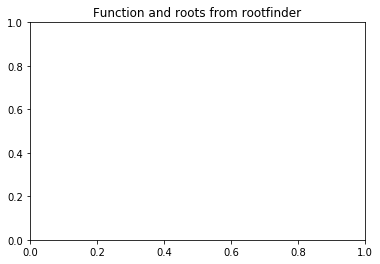

In [78]:
# Very basic test 
x = Variable('x')
y = Variable('y')

test_f0 =  x+1

results_t0= rf.vectorNewton(test_f0, num_starting_vals=10, verbose=True)
results_t0
pretty_print_results(results_t0)

roots = [result[0]['x'] for result in results_t0]
val_at_root = [result[1] for result in results_t0]

plt.title("Function and roots from rootfinder")
x_plt = np.arange(min(roots)-5, max(roots)+5,1)
y_plt= x_plt+1
x_new = np.linspace(min(x_plt), max(x_plt),500)
f = interp1d(x_plt, y_plt)
y_smooth=f(x_new)
plt.plot (x_new,y_smooth) 
plt.axhline(y=0,color='r')
plt.plot(roots, val_at_root, marker='o', markersize=10, color="black")
plt.legend(["Function","Line at zero","root"])
#plt.scatter(x_plt,y_plt)
plt.show()

for i, root in enumerate(roots):
    r = test_f0.get_val({'x':root})
    print("Evaluation of our function at root number {}: {}".format(i,r))

RootFinder found a total of 0 roots for the function



ValueError: min() arg is an empty sequence

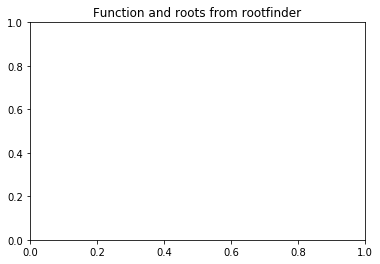

In [79]:
x = Variable('x')
test_f1 = x**3+1
results_t1= rf.vectorNewton(test_f1, num_starting_vals=10, verbose=True)
pretty_print_results(results_t1)

roots = [result[0]['x'] for result in results_t1]
val_at_root = [result[1] for result in results_t1]

plt.title("Function and roots from rootfinder")
x_plt = np.arange(min(roots)-5, max(roots)+5,1)
y_plt= x_plt**3 +1
x_new = np.linspace(min(x_plt), max(x_plt),500)
f = interp1d(x_plt, y_plt)
y_smooth=f(x_new)
plt.plot (x_new,y_smooth) 
plt.axhline(y=0,color='r')
plt.plot(roots, val_at_root, marker='o', markersize=10, color="black")
plt.legend(["Function","Line at zero","root"])
plt.show()

for i, root in enumerate(roots):
    r = test_f1.get_val({'x':root})
    print("Evaluation of our function at root number {}: {}".format(i,r))

RootFinder found a total of 0 roots for the function



ValueError: min() arg is an empty sequence

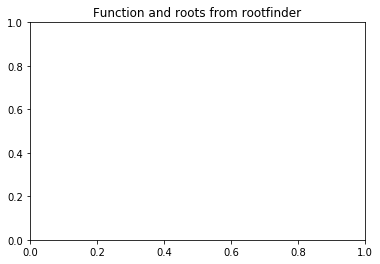

In [73]:
# Test a function with many roots 
x = Variable('x')
test_f2 = mo.sin(x)+0.5
results_t2= rf.vectorNewton(test_f2, num_starting_vals=20, starting_val_range = (-10,10), verbose=True)
pretty_print_results(results_t2)

roots = [result[0]['x'] for result in results_t2]
val_at_root = [result[1] for result in results_t2]

plt.title("Function and roots from rootfinder")
x_plt = np.arange(min(roots)-5, max(roots)+5,1)
y_plt= np.sin(x_plt)+0.5
x_new = np.linspace(min(x_plt), max(x_plt),500)
f = interp1d(x_plt, y_plt, kind='quadratic')
y_smooth=f(x_new)
plt.plot (x_new,y_smooth) 
plt.axhline(y=0,color='r')
plt.scatter(roots, val_at_root, marker='o', s=30, color="black")
plt.legend(["Function","Line at zero","roots"])
plt.show()

for i, root in enumerate(roots):
    r = test_f2.get_val({'x':root})
    print("Evaluation of our function at root number {}: {}".format(i,r))

RootFinder found a total of 2 roots for the function

Found root: {'x': -7.529428631859002e-16, 'y': 7.529428631859002e-16}
Function value at root: [7.529428631859008e-16, 0.0]
Number of iterations needed to find the root: 14
List of error values:[221370, 55342.43750007058, 13835.546875299979, 3458.824219954313, 864.6435595056826, 216.09840794222754, 53.96217420702665, 13.42833177115071, 3.2957252604519525, 0.7658380299180744, 0.14434089657878282, 0.01320830188164656, 0.00016570453643513616, 2.7439805793980184e-08]

Found root: {'x': 1.0, 'y': -1.0}
Function value at root: [0.0, 0.0]
Number of iterations needed to find the root: 14
List of error values:[164536, 40501.43750009644, 10125.296875409895, 2531.2617203955992, 632.7529362711012, 158.12575875170504, 39.46903834570143, 9.805152974600166, 2.390342173265977, 0.5410033369109024, 0.09250422750798659, 0.006245931743024791, 3.806076361234645e-05, 1.4484011767734728e-09]



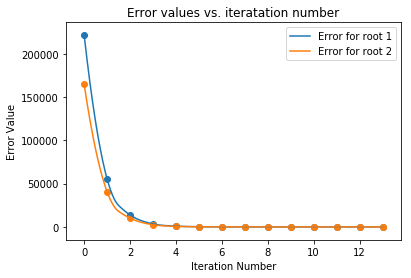

Evaluation of our function at root number 0: [7.529428631859008e-16, 0.0]
Evaluation of our function at root number 1: [0.0, 0.0]


In [74]:
# Test a vector valued function
x = Variable('x')
y = Variable('y')

test_f3 = VectorFunction([x**2+y, y+x])
results_t3= rf.vectorNewton(test_f3, num_starting_vals=10, verbose=True)
pretty_print_results(results_t3)

roots = [result[0] for result in results_t3]
val_at_root = [result[1] for result in results_t3]

for i, root in enumerate(roots):
    r = test_f3.get_val(root)
    print("Evaluation of our function at root number {}: {}".format(i,r))

RootFinder found a total of 3 roots for the function

Found root: {'x3': 0.9999999999999999, 'x2': 1.0, 'x1': 1.0000000000000002}
Function value at root: [1.1102230246251565e-16, 0.0, 4.440892098500626e-16]
Number of iterations needed to find the root: 32
List of error values:[285668635, 80404753.90463038, 22720699.39424774, 841970952.4702804, 212573032.30740777, 731381712.1285093, 154815680.37972334, 43112262.205004804, 11874894.731216995, 3140613.226724032, 1025965.7560503269, 609313.9914693758, 119953.08491261136, 148525.90453915, 4556553.194366214, 1341011.0781090138, 397083.2571773286, 116236.16663815606, 33661.7761169409, 9690.43983200984, 2776.833031766765, 791.519758746388, 224.07869830316247, 62.94958680628985, 17.64970057066941, 5.129441640826549, 1.7678360453688255, 0.9223829684219021, 0.13035109479535478, 0.0102900829139001, 2.016405358662432e-05, 1.726880860530855e-10]

Found root: {'x3': 1.519323203656175, 'x2': -0.12797571432512553, 'x1': 2.225946744445856}
Function valu

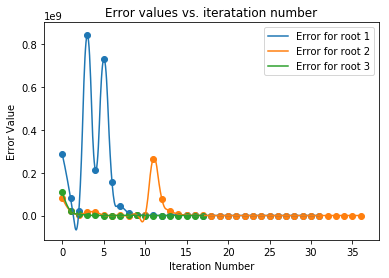

Evaluation of our function at root number 0: [1.1102230246251565e-16, 0.0, 4.440892098500626e-16]
Evaluation of our function at root number 1: [1.824396189675781e-11, 1.8290036152279754e-11, 1.983802011551461e-12]
Evaluation of our function at root number 2: [0.0, 0.0, 4.440892098500626e-15]


In [27]:
# Test a second vector valued function
x1 = Variable('x1')
x2 = Variable('x2')
x3 = Variable('x3')

f1 = x1**2 - 2*x1+x2**2-x3+1
f2 = x1*x2**2-x1-3*x2+x2*x3+2
f3 = x1*x3**2-3*x3+x2*x3**2+x1*x2

test_f4 = VectorFunction([f1,f2,f3])
results_t4= rf.vectorNewton(test_f4, num_starting_vals=5, verbose=True)
pretty_print_results(results_t4)

roots = [result[0] for result in results_t4]
val_at_root = [result[1] for result in results_t4]

for i, root in enumerate(roots):
    r = test_f4.get_val(root)
    print("Evaluation of our function at root number {}: {}".format(i,r))